In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

The type of this input is <class 'numpy.ndarray'>
Shape: (800, 1200, 3)


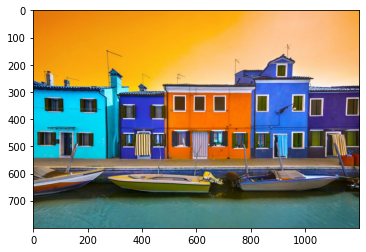

In [ ]:
image = cv2.imread('sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)


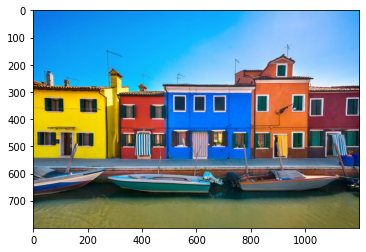

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

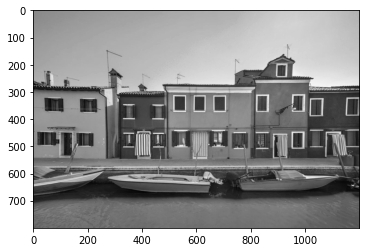

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

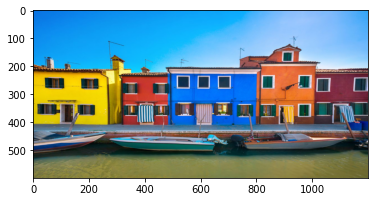

In [ ]:

resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [ ]:
def RGB2HEXADECIMAL(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
def get_colors(image, number_of_colors, show_chart):
  modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
  modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
  clf = KMeans(n_clusters = number_of_colors)
  labels = clf.fit_predict(modified_image)
  counts = Counter(labels)
  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEXADECIMAL(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]
  
  if (show_chart):
      plt.figure(figsize = (8, 6))
      plt.pie(counts.values(), labels = hex_colors, colors = hex_colors,autopct='%1.1f%%',)
      plt.title("Color Classification")

  return rgb_colors




[array([33.8098167 , 49.85851121, 52.70683619]),
 array([130.61634954, 196.78018323, 251.35591261]),
 array([203.96068591, 192.29618012, 193.91879269]),
 array([ 13.64776465, 151.97484427, 243.54243766]),
 array([234.18521297, 199.77561057,   6.77127615]),
 array([125.44452336, 108.26165956,  69.51538826]),
 array([ 99.05325581, 120.11505814, 142.46546512]),
 array([208.43530769,  96.78621345,  47.4166497 ])]

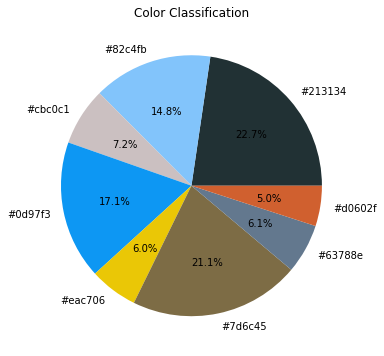

In [ ]:
get_colors(get_image("/content/sample_image.jpg" ), 8, True)

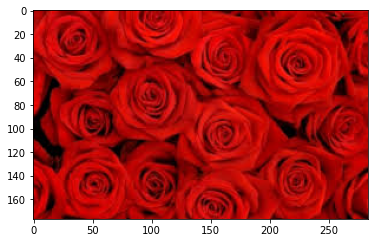

In [ ]:
image = cv2.imread('colorpicture.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

[array([147.37424595,   5.39269706,   4.93424999]),
 array([102.24972933,   4.25395859,   3.77408986]),
 array([181.07561584,   8.8896523 ,   7.67930713]),
 array([37.03526664,  2.5584274 ,  2.34130012]),
 array([213.74051009,  14.92715209,  11.04160798])]

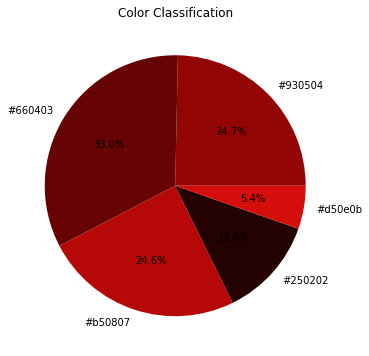

In [ ]:
get_colors(get_image("/content/colorpicture.jpg" ), 5, True)